<center><img src="./images/nup_logo_dark.jpeg" width=300 style="display: inline-block;"></center> 

## Fundamentals of ML
### Linear models practice

<br />
<br />
October 15, 2024

### Multivariate linear regression

The task is to find $\hat{w} = \arg\min\limits_{w\in R^n} \frac{1}{\ell} \sum\limits_{i=1}^\ell (w^T x_i - y_i)^2$

Two approaches to solve it:
1. Numerically (gradient descent)
2. Analytically

Let's rewrite the minimized function in matrix form:

$$\sum\limits_{i=1}^\ell (w^T x_i - y_i)^2 = (Xw - y)^T(Xw - y) = \\ w^TX^TXw - y^TXw - w^TX^Ty + y^Ty = w^TX^TXw - 2 y^TXw +y^2 $$ 

$(y^TXw = w^TX^Ty)$, because the transposed scalar is equal to itself

Remark (what we need to know about the gradient):

$\frac{\partial}{\partial w} w^Ta = a$ (is checked coordinate-wise)

$\frac{\partial}{\partial w} a^Tw = a$ (is checked coordinate-wise)

$\frac{\partial}{\partial w} w^Tw = 2w$ (is checked coordinate-wise)

$\frac{\partial}{\partial w} f(\vec{g}(w)) = \frac{\partial \vec{g}}{\partial w} \left(\frac{\partial}{\partial w}f\right)(\vec{g}(w))$, where $\frac{\partial \vec{g}}{\partial w}$ is the derivative matrix of $\vec{g}(w)$,

that is $\begin{pmatrix}
{\partial g_1 \over \partial w_1}(w) & {\partial g_1 \over \partial w_2}(w) & \cdots & {\partial g_1 \over \partial w_n}(w) \\
{\partial g_2 \over \partial w_1}(w) & {\partial g_2 \over \partial w_2}(w) & \cdots & {\partial g_2 \over \partial w_n}(w) \\
\cdots & \cdots & \cdots &\cdots \\
{\partial g_n \over \partial w_1}(w) & {\partial g_n \over \partial w_2}(w) & \cdots & {\partial g_n \over \partial w_n}(w)
\end{pmatrix}$(checked coordinate-wise)

Let's calculate the gradient:

$\frac{\partial}{\partial w} w^TX^TXw - 2y^TXw +y^2= \frac{\partial}{\partial w} (Xw)^TXw - \frac{\partial}{\partial w} 2 y^TX w =  2X^TXw - 2 X^Ty$ (see tasks 2 and 1 of the second seminar)

Condition of minimum:

$(2X^TXw - 2X^Ty) = 0$,

therefore:

$\hat{w} = (X^TX)^{-1}X^Ty$

**Remark.**

The found point is a minimum if the matrix $X^T X$ is invertible. From the course of mathematical analysis it is known that if the Hessian matrix of a function is positive definite at a point where its gradient is zero, then this point is a local minimum.

$\nabla^2 Q(w) = 2X^TX$

We need to understand if the matrix $X^TX$ is positive definite. Let's write the definition of positive definiteness of the matrix $X^TX$:

$z^TX^TXz > 0, \; \forall z \in \mathbb{R}^d, z \ne 0$

We see here this is the square of the vector norm $Xz$, i.e., this expression will be greater than or equal to zero. If the matrix $X$ has a "book" orientation (number of rows is greater or equal to the number of columns) and is of full rank (no linearly dependent columns), then the vector $Xz$ cannot be zero. Therefore the following holds true:

$z^TX^TXz = ||Xz||^2 > 0, \; \forall z \in \mathbb{R}^d, z \ne 0$

That is, $X^TX$ is a positive definite matrix. Also, according to Sylvester's criterion, all leading minors (including determinant) of a positive definite matrix are positive. Hence, the matrix $X^TX$ is invertible, and the solution exists. If the number of rows turns out to be less than the number of columns, or $X$ is not full rank, then $X^TX$ is not invertable and the solution $w$ is not uniquely defined. 

And if there is a bias term?

Task: find $\hat{w} = \arg \min\limits_{w\in R^n} \frac{1}{\ell} \sum\limits_{i=1}^\ell (w^T x_i + w_0- y_i)^2$

And what about ridge regression?

Task: find $\hat{w} = \arg \min\limits_{w\in R^n} \frac{1}{\ell} \sum\limits_{i=1}^\ell (w^T x_i + w_0 - y_i)^2 + \alpha (w^T w + w_0^2)$

### Task 1

Calculate the gradients 

$$\frac {\partial}{\partial w} (Xw - y)^T(Xw -y) + \gamma w^T \mathbb{1}$$

$$\frac {\partial}{\partial w} ||(Xw - y)||_1 + \gamma(w^Tw)^4$$

<details>
<summary>Solution</summary>

$2X^TXw + \gamma \mathbb{1}$,

The gradient of $||x||_1 = \mathrm{sign}(x)$ (coordinate-wise), the gradient of $w^Tw = 2w$, complex function: 
$X \mathrm{sign}(Xw-y) + 4 (w^Tw) 2 w$
</details>

In [1]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Generate the data:

In [2]:
import numpy as np
np.random.seed(0)
l = 40

x = np.linspace(0, 30, num=l)
Y = x + 4*np.sin(x) + 3*np.random.randn(l)

X = np.vstack([np.ones_like(x), x, np.sin(x)]).T

In [3]:
X[:5]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.76923077, 0.69558279],
       [1.        , 1.53846154, 0.99947728],
       [1.        , 2.30769231, 0.740558  ],
       [1.        , 3.07692308, 0.06462451]])

In [4]:
Y[:5]

array([ 5.29215704,  4.75203357,  8.4725846 , 11.99260391,  8.93809509])

Create a linear regressor (without regularization):

In [5]:
reg = LinearRegression(fit_intercept=False)
X.shape, Y.shape

((40, 3), (40,))

Train it on the test set

In [7]:
reg.fit(X, Y)

LinearRegression(fit_intercept=False)

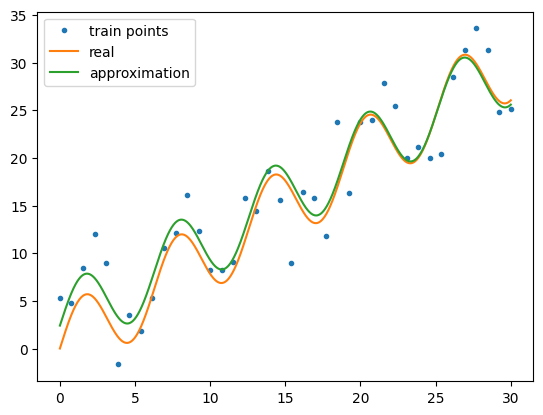

In [8]:
import matplotlib.pyplot as plt

plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, x_plot + 4*np.sin(x_plot), label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot)]).T
plt.plot(x_plot, reg.predict(X_plot), label='approximation')

plt.legend(loc='best')
plt.show()

In [9]:
X_plot.shape

(10000, 3)

In [10]:
reg.coef_

array([2.40304643, 0.90236995, 3.92967158])

If regularization is needed, in sklearn there are Ridge (L_2) and Lasso (L_1) regressors, and much more: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [11]:
from sklearn.linear_model import Ridge, Lasso

In [12]:
reg = Ridge(alpha=10.0, fit_intercept=False)

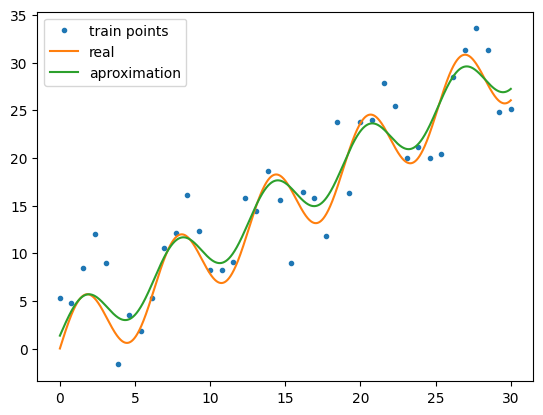

In [13]:
reg.fit(X, Y)
plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot)]).T
plt.plot(x_plot, reg.predict(X_plot), label='aproximation')

plt.legend(loc='best')
plt.show()

In [14]:
reg.coef_

array([1.34716055, 0.95145871, 2.67776413])

### Task 2

Verify that the analytical solution of Ridge regression coincides with the solution obtained by sklearn. 

#### Solution

In [15]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + np.eye(X.shape[1]) * 10), X.T), Y)

In [16]:
w

array([1.34716055, 0.95145871, 2.67776413])

### Why do we need Lasso?

In [17]:
np.random.seed(0)
l = 40

x = np.linspace(0, 30, num=l)
Y = x + 4*np.sin(x) + 0.1*np.random.randn(l)

X = np.vstack([np.ones_like(x), x, np.sin(x)]).T

#### Let's add features!

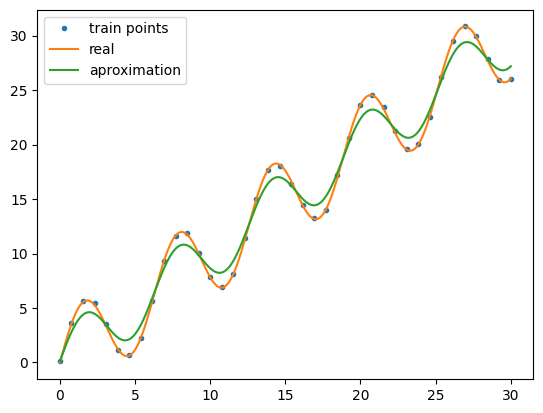

In [18]:
reg = Ridge(alpha=10.0, fit_intercept=False)
X = np.vstack([np.ones_like(x), x, np.sin(x), np.cos(x), np.tanh(x)]).T
reg.fit(X, Y)
plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot), np.cos(x_plot), np.tanh(x_plot)]).T
plt.plot(x_plot, reg.predict(X_plot), label='aproximation')

plt.legend(loc='best')
plt.show()

In [19]:
reg.coef_

array([ 0.13384168,  0.9865229 ,  2.65916602, -0.00828249,  0.08764917])

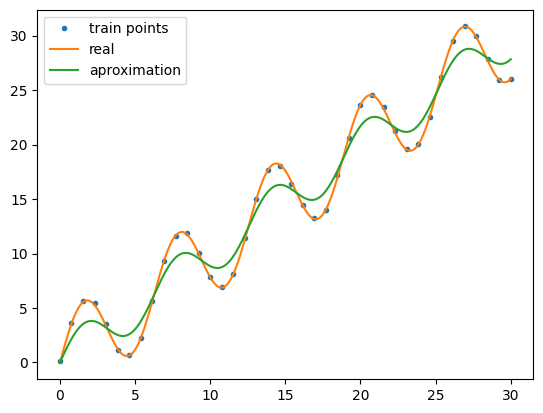

In [20]:
reg = Lasso(alpha=1.0, fit_intercept=False)
X = np.vstack([np.ones_like(x), x, np.sin(x), np.cos(x), np.tanh(x)]).T
reg.fit(X, Y)
plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot), np.cos(x_plot), np.tanh(x_plot)]).T
plt.plot(x_plot, reg.predict(X_plot), label='aproximation')

plt.legend(loc='best')
plt.show()

In [21]:
reg.coef_

array([0.        , 0.99381765, 2.00331928, 0.        , 0.        ])

Lasso regression allows to eliminate "unnecessary" features:

![lasso_and_ridge](./images/lasso_and_ridge.png)

Unfortunately, solving the Lasso regression analytically is not possible.
So, we solve it with gradient descent (more precisely, subgradient, as it's not differentiable in places).

$$(Xw - y)^T(Xw - y) + \gamma||w||_1$$ 

## Gradient Descent

### Task 3

Show that for any $\alpha$ there exists such a convex function $f(x)$ that the gradient descent, 
in which each time a step is taken on $\alpha \frac {\partial f} {\partial x}$, will diverge.

<details>
<summary>Solution</summary>

In the parabola $x^2$ you can jump from branch to branch (if you stand at the point $0.5$).
</details>

### How to cope with this problem?

Take step on $\alpha_k$, where each subsequent step is smaller than the previous one. 

### Task 4

Let $\alpha_k = \frac{1}{k^2}$. Show that such a method may not converge to the optimum.

**Solution**

$\sum \frac{1}{k^2}$ — converges. So if we start far from zero, we just won't reach zero "physically".

Commonly used options:

$\alpha_k = \frac{1}{k}$,

$\alpha_k = \frac{1}{{\sqrt{k}}}$,

$\alpha_k = \gamma^{\lfloor \frac {k}{step}\rfloor}$ 

### Task 5

Suppose $\alpha_k = \frac{1}{k}$. Could such a method not converge to the optimum?

**Solution** 

No. The only exception is that it can converge to a local minimum in the case of a non-convex function.

Another one of the ways to choose the steps that will definitely converge:
Khachian method (ellipsoids): https://en.wikipedia.org/wiki/Ellipsoid_method 

Choose an ellipse that initially contains the solution and move from its center along the gradient to the center of the new ellipse — then the search area is guaranteed to decrease by a constant factor.